In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn import model_selection, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import shutil
import os

In [2]:
df_train = pd.read_csv("./dataset/train_label_balanced.csv")
df_train.shape

(3300, 82)

In [3]:
df_test = pd.read_csv("./dataset/test.csv")
df_test.shape

(1459, 80)

In [4]:
df_SalePrice = df_train['SalePrice']

In [5]:
df_train.drop(['SalePrice_label', 'Id', 'SalePrice'], axis=1, inplace=True)
df_train.shape

(3300, 79)

In [6]:
df_test_Id = df_test[['Id']]

In [7]:
df_test.drop(['Id'], axis=1, inplace=True)
df_test.shape

(1459, 79)

In [8]:
df = pd.concat([df_train, df_test])

In [9]:
df.shape

(4759, 79)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     4759 non-null   int64  
 1   MSZoning       4755 non-null   object 
 2   LotFrontage    4238 non-null   float64
 3   LotArea        4759 non-null   int64  
 4   Street         4759 non-null   object 
 5   Alley          236 non-null    object 
 6   LotShape       4759 non-null   object 
 7   LandContour    4759 non-null   object 
 8   Utilities      4757 non-null   object 
 9   LotConfig      4759 non-null   object 
 10  LandSlope      4759 non-null   object 
 11  Neighborhood   4759 non-null   object 
 12  Condition1     4759 non-null   object 
 13  Condition2     4759 non-null   object 
 14  BldgType       4759 non-null   object 
 15  HouseStyle     4759 non-null   object 
 16  OverallQual    4759 non-null   int64  
 17  OverallCond    4759 non-null   int64  
 18  YearBuil

### Numeric

In [11]:
df_num = df.select_dtypes(include='number')
df_num.shape

(4759, 36)

In [12]:
df_num.fillna(df_num.mean(), inplace=True)
df_num.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


(4759, 36)

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     4759 non-null   int64  
 1   LotFrontage    4759 non-null   float64
 2   LotArea        4759 non-null   int64  
 3   OverallQual    4759 non-null   int64  
 4   OverallCond    4759 non-null   int64  
 5   YearBuilt      4759 non-null   int64  
 6   YearRemodAdd   4759 non-null   int64  
 7   MasVnrArea     4759 non-null   float64
 8   BsmtFinSF1     4759 non-null   float64
 9   BsmtFinSF2     4759 non-null   float64
 10  BsmtUnfSF      4759 non-null   float64
 11  TotalBsmtSF    4759 non-null   float64
 12  1stFlrSF       4759 non-null   int64  
 13  2ndFlrSF       4759 non-null   int64  
 14  LowQualFinSF   4759 non-null   int64  
 15  GrLivArea      4759 non-null   int64  
 16  BsmtFullBath   4759 non-null   float64
 17  BsmtHalfBath   4759 non-null   float64
 18  FullBath

In [14]:
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,...,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000
mean,52.188485,85.237140,14166.673251,7.375079,5.371927,1980.978777,1990.693003,288.344563,791.044767,38.270071,...,607.619168,141.810254,65.969111,16.037613,2.416474,23.466905,36.028998,36.777684,5.824753,2007.777684
std,34.364561,30.578026,13378.845162,2.147928,1.062535,30.702065,19.629516,394.797082,718.689854,151.101094,...,260.755676,152.335453,72.957372,54.268350,24.435968,71.435948,136.833485,461.334178,2.839398,1.337906
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,63.000000,8717.500000,6.000000,5.000000,1962.000000,1980.000000,0.000000,0.000000,0.000000,...,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,60.000000,85.237140,11846.000000,8.000000,5.000000,1995.000000,1996.000000,108.000000,663.000000,0.000000,...,642.000000,127.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,60.000000,104.000000,15623.000000,9.000000,6.000000,2005.000000,2006.000000,424.000000,1387.000000,0.000000,...,820.000000,216.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
dic_c_unique_len = {}
for c in df_num.columns:
    dic_c_unique_len[c] = len(df_num[c].unique())
    #print(c, len(df_num[c].unique()))
 

df_c_unique_len = pd.DataFrame.from_dict(dic_c_unique_len, orient="index").reset_index()
df_c_unique_len.columns=['variable', 'count']
df_c_unique_len[df_c_unique_len['count'] < 20].sort_values('count')

,variable,count
19,HalfBath,3
17,BsmtHalfBath,4
21,KitchenAbvGr,4
16,BsmtFullBath,5
18,FullBath,5
23,Fireplaces,5
35,YrSold,5
25,GarageCars,7
20,BedroomAbvGr,8
4,OverallCond,9


In [16]:
df_num.shape

(4759, 36)

In [17]:
df_num_dummies_list = []


for index, row in df_c_unique_len[df_c_unique_len['count'] < 20].iterrows():
    df_num_dummies_list.append( pd.get_dummies(df_num[row['variable']], prefix=row['variable']))
    df_num.drop([row['variable']], axis=1, inplace=True)
    #print(row['variable'], row['count'])
    
len(df_num_dummies_list)

df_num_dummies = df_num_dummies_list[0]

for i in range(1, len(df_num_dummies_list)-1):
    #df_num_dummies = df_num_dummies.join(df_num_dummies_list[i])
    df_num_dummies = pd.concat([df_num_dummies, df_num_dummies_list[i]], axis=1)

df_num_dummies.head()    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df_num_dummies.shape

(4759, 114)

In [19]:
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,60.00000,6324,1927,1950,0.0,0.0,0.0,520.0,520.0,520,...,0,520,1920.000000,240.0,49,0,87,0,0,0
1,50.00000,8500,1920,1950,0.0,0.0,0.0,649.0,649.0,649,...,0,1317,1920.000000,250.0,0,54,172,0,0,0
2,30.00000,5232,1925,2004,0.0,0.0,0.0,680.0,680.0,764,...,0,764,1965.000000,504.0,0,0,0,0,0,0
3,85.23714,10020,1922,1950,0.0,350.0,0.0,333.0,683.0,904,...,0,904,1987.469559,0.0,0,0,0,0,0,0
4,60.00000,8967,1920,1950,0.0,0.0,0.0,961.0,961.0,1077,...,0,1077,1920.000000,338.0,0,0,0,0,0,0


In [20]:
df_num.shape

(4759, 21)

##### df_num doit être standardisé

### Object

In [21]:
df_cat = df.select_dtypes(include='object')
df_cat.shape 

(4759, 43)

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       4755 non-null   object
 1   Street         4759 non-null   object
 2   Alley          236 non-null    object
 3   LotShape       4759 non-null   object
 4   LandContour    4759 non-null   object
 5   Utilities      4757 non-null   object
 6   LotConfig      4759 non-null   object
 7   LandSlope      4759 non-null   object
 8   Neighborhood   4759 non-null   object
 9   Condition1     4759 non-null   object
 10  Condition2     4759 non-null   object
 11  BldgType       4759 non-null   object
 12  HouseStyle     4759 non-null   object
 13  RoofStyle      4759 non-null   object
 14  RoofMatl       4759 non-null   object
 15  Exterior1st    4758 non-null   object
 16  Exterior2nd    4758 non-null   object
 17  MasVnrType     4689 non-null   object
 18  ExterQual      4759 non-null

##### Remplacer les nan par la valeur la plus présente

In [23]:
df_cat.fillna(df_cat.mode().iloc[0], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       4759 non-null   object
 1   Street         4759 non-null   object
 2   Alley          4759 non-null   object
 3   LotShape       4759 non-null   object
 4   LandContour    4759 non-null   object
 5   Utilities      4759 non-null   object
 6   LotConfig      4759 non-null   object
 7   LandSlope      4759 non-null   object
 8   Neighborhood   4759 non-null   object
 9   Condition1     4759 non-null   object
 10  Condition2     4759 non-null   object
 11  BldgType       4759 non-null   object
 12  HouseStyle     4759 non-null   object
 13  RoofStyle      4759 non-null   object
 14  RoofMatl       4759 non-null   object
 15  Exterior1st    4759 non-null   object
 16  Exterior2nd    4759 non-null   object
 17  MasVnrType     4759 non-null   object
 18  ExterQual      4759 non-null

In [25]:
dic_c_cat_unique_len = {}
for c in df_cat.columns:
    dic_c_cat_unique_len[c] = len(df_cat[c].unique())
    #print(c, len(df_num[c].unique()))
 

df_c_cat_unique_len = pd.DataFrame.from_dict(dic_c_cat_unique_len, orient="index").reset_index()
df_c_cat_unique_len.columns=['variable', 'count']
df_c_cat_unique_len[df_c_cat_unique_len['count'] < 20].sort_values('count')

,variable,count
5,Utilities,1
28,CentralAir,2
1,Street,2
2,Alley,2
34,GarageFinish,3
37,PavedDrive,3
7,LandSlope,3
38,PoolQC,3
39,Fence,4
18,ExterQual,4


In [26]:
df_cat_dummies_list = []


for index, row in df_c_cat_unique_len.iterrows():
    df_cat_dummies_list.append( pd.get_dummies(df_cat[row['variable']], prefix=row['variable']))
    df_cat.drop([row['variable']], axis=1, inplace=True)
    #print(row['variable'], row['count'])
    
len(df_cat_dummies_list)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


43

In [27]:

df_cat_dummies = df_cat_dummies_list[0]
df_cat_dummies['key'] = 0
df_cat_dummies = df_cat_dummies[['key']]
df_cat_dummies.shape

(4759, 1)

In [28]:
shutil.rmtree('./dataset/tmp', ignore_errors=True)
os.mkdir('./dataset/tmp')

In [29]:

df_cat_dummies = df_cat_dummies_list[i]

for i in range(1, len(df_cat_dummies_list)-1):
    
    print(df_cat_dummies.shape)
    #df_cat_dummies.join(df_cat_dummies_list[i])
    df_cat_dummies = pd.concat([df_cat_dummies, df_cat_dummies_list[i]], axis = 1)
    
    print(df_cat_dummies.shape)

    
    #print(i, len(df_cat_dummies_list[i].columns))
    
    
    if i%7 == 0:
        df_cat_dummies.drop(['key'], axis=1, errors='ignore', inplace=True)
        df_cat_dummies.to_csv(f"./dataset/tmp/df_cat_dummies_{i}.csv", index=False)
        
        df_cat_dummies = df_cat_dummies_list[0]
        df_cat_dummies['key'] = 0
        df_cat_dummies = df_cat_dummies[['key']]
        print('init df')

df_cat_dummies.drop(['key'], errors='ignore', axis=1, inplace=True)        
df_cat_dummies.to_csv(f"./dataset/tmp/df_cat_dummies_999.csv", index=False)

df_cat_dummies.shape

(4759, 6)
(4759, 8)
(4759, 8)
(4759, 10)
(4759, 10)
(4759, 14)
(4759, 14)
(4759, 18)
(4759, 18)
(4759, 19)
(4759, 19)
(4759, 24)
(4759, 24)
(4759, 27)
init df
(4759, 1)
(4759, 26)
(4759, 26)
(4759, 35)
(4759, 35)
(4759, 41)
(4759, 41)
(4759, 46)
(4759, 46)
(4759, 54)
(4759, 54)
(4759, 60)
(4759, 60)
(4759, 66)
init df
(4759, 1)
(4759, 16)
(4759, 16)
(4759, 32)
(4759, 32)
(4759, 36)
(4759, 36)
(4759, 40)
(4759, 40)
(4759, 45)
(4759, 45)
(4759, 51)
(4759, 51)
(4759, 55)
init df
(4759, 1)
(4759, 5)
(4759, 5)
(4759, 9)
(4759, 9)
(4759, 15)
(4759, 15)
(4759, 21)
(4759, 21)
(4759, 26)
(4759, 26)
(4759, 31)
(4759, 31)
(4759, 33)
init df
(4759, 1)
(4759, 6)
(4759, 6)
(4759, 10)
(4759, 10)
(4759, 17)
(4759, 17)
(4759, 22)
(4759, 22)
(4759, 28)
(4759, 28)
(4759, 31)
(4759, 31)
(4759, 36)
init df
(4759, 1)
(4759, 6)
(4759, 6)
(4759, 9)
(4759, 9)
(4759, 12)
(4759, 12)
(4759, 16)
(4759, 16)
(4759, 20)
(4759, 20)
(4759, 29)


(4759, 28)

In [30]:

csv_files = glob.glob("./dataset/tmp/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)


df_cat_dummies = pd.concat(df_list, axis=1)

df_cat_dummies.shape    

(4759, 241)

In [31]:
df_cat_dummies.head() 

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Standardisation des variables numériques (hors hot spot)

In [32]:
scaler = preprocessing.StandardScaler().fit(df_num)
df_num[df_num.columns] = pd.DataFrame(scaler.transform(df_num), index=df_num.index)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,-0.825423,-0.586261,-1.758333,-2.073270,-0.730438,-1.100792,-0.253301,-0.242083,-1.383201,-1.663191,...,-0.122708,-1.492105,-2.900459e+00,-1.409970,-0.609313,-0.904309,1.307758,-0.0989,-0.328537,-0.079729
1,-1.152489,-0.423599,-1.986354,-2.073270,-0.730438,-1.100792,-0.253301,0.016356,-1.195406,-1.450970,...,-0.122708,-0.774283,-2.900459e+00,-1.371616,-0.931006,-0.164073,2.874213,-0.0989,-0.328537,-0.079729
2,-1.806622,-0.667891,-1.823482,0.677979,-0.730438,-1.100792,-0.253301,0.078462,-1.150278,-1.261782,...,-0.122708,-1.272345,-9.659473e-01,-0.397422,-0.931006,-0.904309,-0.295555,-0.0989,-0.328537,-0.079729
3,0.000000,-0.309975,-1.921205,-2.073270,-0.730438,-0.613743,-0.253301,-0.616720,-1.145910,-1.031465,...,-0.122708,-1.146254,-1.954920e-14,-2.330469,-0.931006,-0.904309,-0.295555,-0.0989,-0.328537,-0.079729
4,-0.825423,-0.388690,-1.986354,-2.073270,-0.730438,-1.100792,-0.253301,0.641419,-0.741206,-0.746860,...,-0.122708,-0.990440,-2.900459e+00,-1.034100,-0.931006,-0.904309,-0.295555,-0.0989,-0.328537,-0.079729


In [34]:
print(df_num.shape, df_num_dummies.shape, df_cat_dummies.shape)

(4759, 21) (4759, 114) (4759, 241)


In [35]:
data = pd.DataFrame()

for c in df_num.columns:
    data[c] = df_num[c]

for c in df_num_dummies.columns:
    data[c] = df_num_dummies[c]
    
for c in df_cat_dummies.columns:
    try:
        data[c] = df_cat_dummies[c]
    except:
        print(f"error : {c}")
    
data.shape

error : RoofStyle_Flat
error : RoofStyle_Gable
error : RoofStyle_Gambrel
error : RoofStyle_Hip
error : RoofStyle_Mansard
error : RoofStyle_Shed
error : RoofStyle_Flat
error : RoofStyle_Gable
error : RoofStyle_Gambrel
error : RoofStyle_Hip
error : RoofStyle_Mansard
error : RoofStyle_Shed


(4759, 364)

In [36]:
#data = df_num.join(df_num_dummies).join(df_cat_dummies) #df.drop(['SalePrice'], axis=1)
#data = pd.concat([df_num, df_num_dummies, df_cat_dummies], axis=1, ignore_index=True)



target = df_SalePrice

print(data.shape, target.shape)

(4759, 364) (3300,)


### Réduction de dimension (PCA)

In [37]:
pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 61


In [38]:
data_test = data.tail(1459)
data = data.head(3300)

print(data.shape, data_test.shape)

(3300, 364) (1459, 364)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [40]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Elastic Net

In [58]:
model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 1), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1, 1.2, 100))

model_en.fit(X_train_pca, y_train)

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1,
                     1.2, 100),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 1))

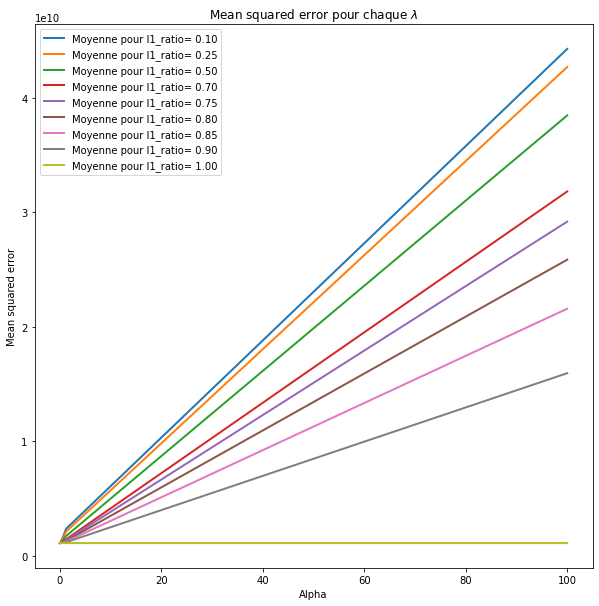

In [59]:
alphas = model_en.alphas_

plt.figure(figsize=(10, 10))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

In [61]:
pred_train = model_en.predict(X_train_pca)
pred_test = model_en.predict(X_test_pca)
print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

rmse train : 32533.63608432717
rmse test : 29644.039518520498


In [62]:
print("score train :",model_en.score(X_train_pca, y_train))
print("score test :", model_en.score(X_test_pca, y_test))

score train : 0.9803285607506075
score test : 0.9840242404087202


In [63]:
moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print("moyenne :", moy)
print("ecart-type :", ec)

pd.DataFrame({'points_obsérvés': (y_test*ec)+moy, 'points_predits': np.round((pred_test*ec)+moy)}, 
             index=X_test.index).head(7)

moyenne : 36.77768438747636
ecart-type : 461.28570579670503


,points_obsérvés,points_predits
1223,1.567219e+08,146385650.0
1764,1.741354e+08,178815669.0
812,6.965418e+07,52957118.0
1993,2.191107e+08,217933458.0
2670,2.821487e+08,269096277.0
400,5.535432e+07,56063544.0
2719,3.436579e+08,341383528.0


### Prédiction

In [51]:
data_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,-0.171289,-0.190221,-0.650799,-1.512830,-0.730438,-0.449538,0.699803,-0.742935,-0.856212,-1.044626,...,0,0,0,0,0,0,0,0,0,1
1,-0.138583,0.007500,-0.748523,-1.665677,-0.456851,0.183625,-0.253301,-0.470472,-0.205483,-0.332290,...,0,0,0,0,0,0,0,0,0,1
2,-0.367529,-0.025167,0.521884,0.372285,-0.730438,-0.000062,-0.253301,-1.009388,-0.789247,-0.991982,...,0,0,0,0,0,0,0,0,0,1
3,-0.236703,-0.313115,0.554458,0.372285,-0.679774,-0.263068,-0.253301,-0.634751,-0.792158,-0.995273,...,0,0,0,0,0,0,0,0,0,1
4,-1.381436,-0.684860,0.359011,0.066590,-0.730438,-0.734810,-0.253301,0.753610,-0.276816,-0.412901,...,0,0,0,0,0,0,0,0,0,1


In [46]:
data_test_pca = pca.transform(data_test)

In [47]:
pred = model_en.predict(data_test_pca)

df_pred = pd.DataFrame(pred, columns=['SalePrice'])
df_pred.head()

,SalePrice
0,162075.882809
1,145725.052340
2,168916.075261
3,203353.327158
4,174732.349609


In [48]:
df_pred = df_test_Id.join(df_pred)

df_pred.shape

(1459, 2)

In [49]:
df_pred.head()

,Id,SalePrice
0,1461,162075.882809
1,1462,145725.052340
2,1463,168916.075261
3,1464,203353.327158
4,1465,174732.349609


In [50]:
df_pred.to_csv('./submission/model_elastic.csv', index=False)